In [323]:
import pandas as pd

In [324]:
ou_df=pd.read_csv('Data_Train.csv')

In [325]:
ou_df.head(15)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU ? BLR,09:00,11:25,2h 25m,non-stop,No info,3873
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR ? BOM ? DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR ? BOM ? DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR ? BOM ? DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL ? BOM ? COK,11:25,19:15,7h 50m,1 stop,No info,8625


In [326]:
ou_df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [327]:
ou_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


# 1- Data Cleaning

## Collecting Columns That Have Nan Values And Put It In The List

In [328]:
nan_columns = ou_df.columns[ou_df.isna().any()].tolist()
print("Columns with NaN values:", nan_columns)

Columns with NaN values: ['Route', 'Total_Stops']


## Searching For The Row That Have Nan Values In The Data Set 

In [329]:
ou_df[ou_df['Route'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


## Dropping Row

In [330]:
ou_df.drop(ou_df.index[9039], inplace=True)

In [331]:
nan_columns = ou_df.columns[ou_df.isna().any()].tolist()
print("Columns with NaN values:", nan_columns)

Columns with NaN values: []


## Replacing 

In [332]:
ou_df['Route'] = ou_df['Route'].str.replace('?', '->')

### Explaination
1- Removing Months. <br>
2- Taking Only Time Without Days. <br>
3- Replacing it.

### Note: Setting a regex flag to false doesn't modify the match results.

In [333]:
o= ou_df['Arrival_Time'].str.replace('^\D+:', '', regex=True)
N_Arrival_Time=[]
for i in o:
    N_Arrival_Time.append(i[0:5])   
ou_df.insert(loc=7, column='N_Arrival_Time', value=N_Arrival_Time)
ou_df = ou_df.drop(columns=['Arrival_Time'])

In [334]:
ou_df.rename(columns={'N_Arrival_Time': 'Arrival_Time'}, inplace=True)

HOURS TO MINUTES

In [335]:
def hours_minutes_to_minutes(combined_time):
    if len(str(combined_time))<3:
        total_minutes=combined_time*60
        return total_minutes
    else:   
        hours = combined_time // 100
        minutes = combined_time % 100
        total_minutes = hours * 60 + minutes
        return total_minutes

In [336]:
H=ou_df['Duration'].str.replace('\D+', '', regex=True)
ll=[]
for i in H:
    ll.append(int(i))

minutes=[]
for i in ll:
    o=hours_minutes_to_minutes(i)
    minutes.append(o)    

ou_df.insert(loc=7, column='Duration (Minutes)', value=minutes)
ou_df = ou_df.drop(columns=['Duration'])

In [337]:
ou_df.head(15)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration (Minutes),Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR -> DEL,22:20,01:10,170,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU -> IXR -> BBI -> BLR,05:50,13:15,445,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL -> LKO -> BOM -> COK,09:25,04:25,1140,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU -> NAG -> BLR,18:05,23:30,325,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR -> NAG -> DEL,16:50,21:35,285,1 stop,No info,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU -> BLR,09:00,11:25,145,non-stop,No info,3873
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR -> BOM -> DEL,18:55,10:25,930,1 stop,In-flight meal not included,11087
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR -> BOM -> DEL,08:00,05:05,135,1 stop,No info,22270
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR -> BOM -> DEL,08:55,10:25,1530,1 stop,In-flight meal not included,11087
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL -> BOM -> COK,11:25,19:15,470,1 stop,No info,8625


In [338]:
ou_df['Airline'].value_counts()

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

## Numerical   

In [339]:
uni=ou_df['Airline'].unique()
i=0
mapping = {v: (i:=i+1) for v in uni }
ou_df['Airline'] = ou_df['Airline'].map(mapping)
print(ou_df['Airline'])

0        1
1        2
2        3
3        1
4        1
        ..
10678    8
10679    2
10680    3
10681    7
10682    2
Name: Airline, Length: 10682, dtype: int64


In [340]:
uni

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [341]:
ou_df['Airline'].value_counts()

Airline
3     3849
1     2053
2     1751
5     1196
4      818
7      479
8      319
6      194
11      13
10       6
9        3
12       1
Name: count, dtype: int64

In [342]:
d= ou_df['Date_of_Journey'].str.replace('\D+', '', regex=True)
DDD=[]
for i in d:
    DDD.append(i)

ou_df.insert(loc=1, column='DDD', value=DDD)
ou_df = ou_df.drop(columns=['Date_of_Journey'])

In [343]:
ou_df.rename(columns={'DDD': 'Date_of_Journey'}, inplace=True)

In [344]:
sou=ou_df['Source'].unique()
i=0
mapping = {v: (i:=i+1) for v in sou }
ou_df['Source'] = ou_df['Source'].map(mapping)
print(ou_df['Source'])

0        1
1        2
2        3
3        2
4        1
        ..
10678    2
10679    2
10680    1
10681    1
10682    3
Name: Source, Length: 10682, dtype: int64


In [345]:
des=ou_df['Destination'].unique()
i=0
mapping = {v: (i:=i+1) for v in des }
ou_df['Destination'] = ou_df['Destination'].map(mapping)
print(ou_df['Destination'])

0        1
1        2
2        3
3        2
4        1
        ..
10678    2
10679    2
10680    5
10681    1
10682    3
Name: Destination, Length: 10682, dtype: int64


In [346]:
rou=ou_df['Route'].unique()
i=0
mapping = {v: (i:=i+1) for v in rou }
ou_df['Route'] = ou_df['Route'].map(mapping)
print(ou_df['Route'])

0         1
1         2
2         3
3         4
4         5
         ..
10678     6
10679     6
10680     1
10681     1
10682    35
Name: Route, Length: 10682, dtype: int64


### If the time is between 00:00 and 06:00, it's considered as 1.
### If the time is between 06:01 and 12:00, it's considered as 2.
### If the time is between 12:01 and 18:00, it's considered as 3.
### If the time is between 18:01 and 24:00, it's considered as 4.

In [347]:
def map_time(time_str):
    hour = int(time_str[:2])
    minute = int(time_str[2:])

    total_minutes = hour * 60 + minute

    if 0 <= total_minutes <= 360: 
        return 1
    elif 361 <= total_minutes <= 720: 
        return 2
    elif 721 <= total_minutes <= 1080:  
        return 3
    elif 1081 <= total_minutes <= 1440:  
        return 4
    else:
        return 5

In [348]:
arr= ou_df['Arrival_Time'].replace('\D+', '', regex=True)
DD1=[]
for i in arr:
    DD1.append(map_time(i))

ou_df.insert(loc=6, column='DD1', value=DD1)
ou_df = ou_df.drop(columns=['Arrival_Time'])

In [349]:
ou_df.rename(columns={'DD1': 'Arrival_Time'}, inplace=True)

In [350]:
dd= ou_df['Dep_Time'].replace('\D+', '', regex=True)
DD=[]
for i in dd:
    DD.append(map_time(i))

ou_df.insert(loc=5, column='DD', value=DD)
ou_df = ou_df.drop(columns=['Dep_Time'])

In [351]:
ou_df.rename(columns={'DD': 'Dep_Time'}, inplace=True)

In [352]:
info=ou_df['Additional_Info'].unique()
i=0
mapping = {v: (i:=i+1) for v in info }
ou_df['Additional_Info'] = ou_df['Additional_Info'].map(mapping)
print(ou_df['Additional_Info'])

0        1
1        1
2        1
3        1
4        1
        ..
10678    1
10679    1
10680    1
10681    1
10682    1
Name: Additional_Info, Length: 10682, dtype: int64


In [353]:
from datetime import datetime

In [354]:
ii=[]
for i in ou_df['Date_of_Journey']:
    date_obj = datetime.strptime(i, '%d%m%Y')
    i=date_obj.strftime('%d%#m%Y')
    ii.append(i)
ou_df.insert(loc=1, column='DD', value=ii)
ou_df = ou_df.drop(columns=['Date_of_Journey'])    

In [355]:
ou_df.rename(columns={'DD': 'Date_of_Journey'}, inplace=True)

In [356]:
ou_df['Total_Stops']=ou_df['Total_Stops'].map({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4})

In [357]:
ou_df.head(15)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration (Minutes),Total_Stops,Additional_Info,Price
0,1,2432019,1,1,1,4,1,170,0,1,3897
1,2,1052019,2,2,2,1,3,445,2,1,7662
2,3,0962019,3,3,3,2,1,1140,2,1,13882
3,1,1252019,2,2,4,4,4,325,1,1,6218
4,1,0132019,1,1,5,3,4,285,1,1,13302
5,4,2462019,2,2,6,2,2,145,0,1,3873
6,3,1232019,1,1,7,4,2,930,1,2,11087
7,3,0132019,1,1,7,2,1,135,1,1,22270
8,3,1232019,1,1,7,2,2,1530,1,2,11087
9,5,2752019,3,3,8,2,4,470,1,1,8625


##  NORMALIZE 

### The Purpose Of Normalization: 
$\;\;\;\;\;$ For Rescaling features to a standard scale.

In [358]:
from sklearn import preprocessing
import numpy as np

In [359]:
arr_p=[]
for z in ou_df:
    arr = np.array(ou_df[z])
    arr_p.append(arr)
normalized_p = preprocessing.normalize(arr_p)

In [360]:
arr_p

[array([1, 2, 3, ..., 3, 7, 2], dtype=int64),
 array(['2432019', '1052019', '0962019', ..., '2742019', '0132019',
        '0952019'], dtype=object),
 array([1, 2, 3, ..., 1, 1, 3], dtype=int64),
 array([1, 2, 3, ..., 5, 1, 3], dtype=int64),
 array([ 1,  2,  3, ...,  1,  1, 35], dtype=int64),
 array([4, 1, 2, ..., 2, 2, 2], dtype=int64),
 array([1, 3, 1, ..., 2, 3, 4], dtype=int64),
 array([ 170,  445, 1140, ...,  180,  160,  500], dtype=int64),
 array([0, 2, 2, ..., 0, 0, 2], dtype=int64),
 array([1, 1, 1, ..., 1, 1, 1], dtype=int64),
 array([ 3897,  7662, 13882, ...,  7229, 12648, 11753], dtype=int64)]

In [361]:
print(normalized_p)

[[0.0026715  0.00534299 0.00801449 ... 0.00801449 0.01870047 0.00534299]
 [0.0127296  0.00550645 0.00503537 ... 0.0143522  0.00069101 0.00498303]
 [0.00357998 0.00715996 0.01073993 ... 0.00357998 0.00357998 0.01073993]
 ...
 [0.         0.01816232 0.01816232 ... 0.         0.         0.01816232]
 [0.00694931 0.00694931 0.00694931 ... 0.00694931 0.00694931 0.00694931]
 [0.00370014 0.00727494 0.01318073 ... 0.00686382 0.01200907 0.01115928]]


# 2- Visualization

In [362]:
import matplotlib.pyplot as plt

## Histogram Of Airline Frequency

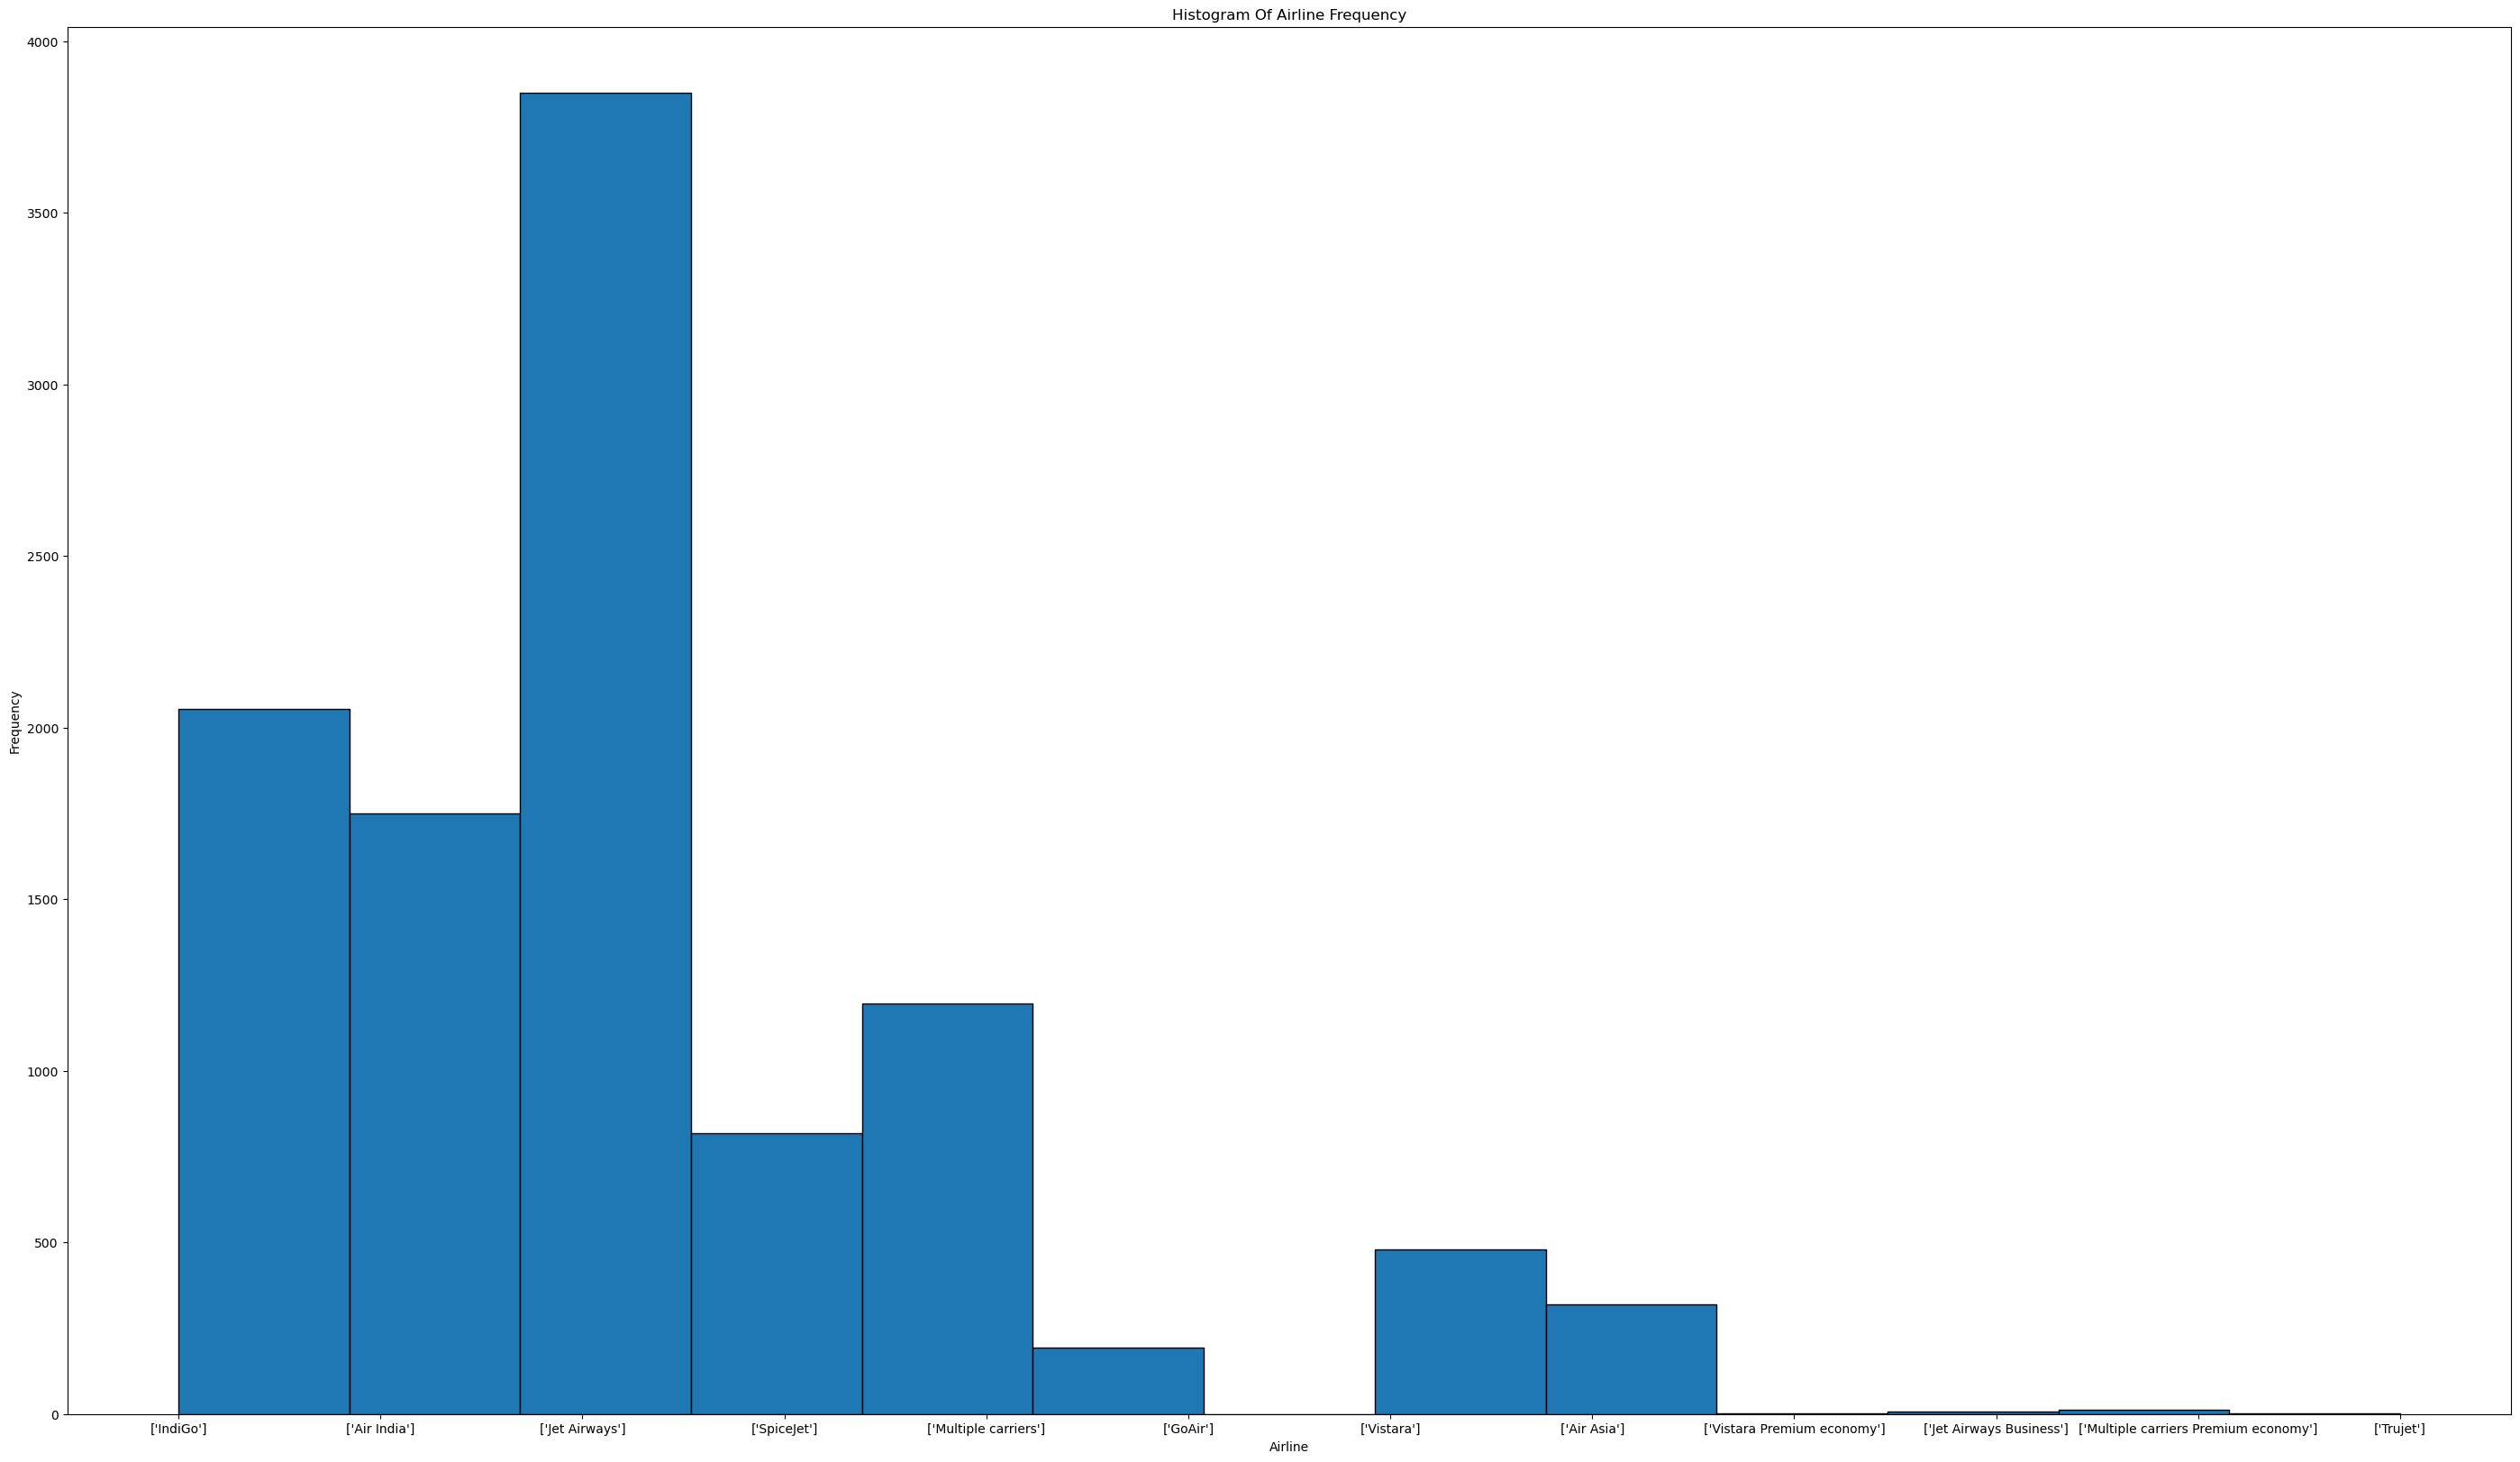

In [363]:
plt.figure(figsize=(35, 20))
plt.hist(ou_df['Airline'],bins=13, edgecolor='black')
x1=[]
for s in range(len(uni)):
    s=s+1
    x1.append(s)
plt.xticks(x1, labels=[['IndiGo'],['Air India'],['Jet Airways'],['SpiceJet'],['Multiple carriers'],['GoAir'],['Vistara'],['Air Asia'],['Vistara Premium economy'],['Jet Airways Business'],['Multiple carriers Premium economy'],['Trujet']])

plt.title('Histogram Of Airline Frequency')
plt.xlabel('Airline')
plt.ylabel('Frequency')
plt.grid(False)


plt.show()


## Top 4 Airline Price's Mean

#### Interested In Airlines That Have More Than 1000 Freq In The Data Set

In [364]:
indiGo_prices = ou_df[ou_df['Airline'] == 1].groupby('Airline')['Price'].mean()
JetAir_prices = ou_df[ou_df['Airline'] == 3].groupby('Airline')['Price'].mean()
AirIndia_prices = ou_df[ou_df['Airline'] == 2].groupby('Airline')['Price'].mean()
Multiplecarriers_prices = ou_df[ou_df['Airline'] == 5].groupby('Airline')['Price'].mean()

In [365]:
print(indiGo_prices)
print(JetAir_prices)
print(AirIndia_prices)
print(Multiplecarriers_prices)

Airline
1    5673.682903
Name: Price, dtype: float64
Airline
3    11643.923357
Name: Price, dtype: float64
Airline
2    9612.427756
Name: Price, dtype: float64
Airline
5    10902.678094
Name: Price, dtype: float64


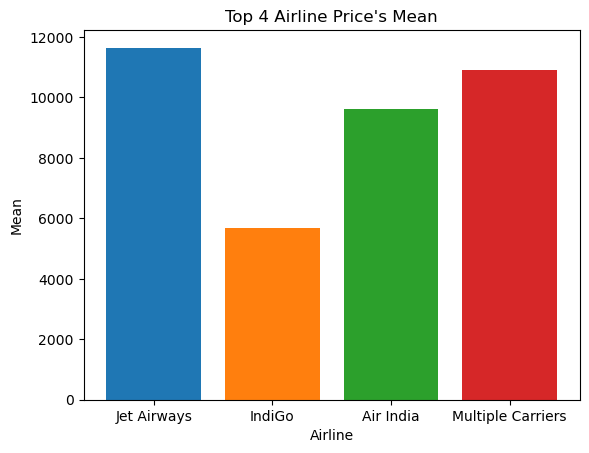

In [366]:
Airline_l = ['Jet Airways','IndiGo','Air India','Multiple Carriers']
Airline_M=[JetAir_prices,indiGo_prices,AirIndia_prices,Multiplecarriers_prices]
fig,ax = plt.subplots()


for i in range(4):
    rects1 = ax.bar(Airline_l[i], Airline_M[i])

ax.set_xlabel('Airline')
ax.set_ylabel('Mean')
ax.set_title("Top 4 Airline Price's Mean")
plt.show()

# 3- Machine Learning
## $\;\;\;$ 'Random Forest Regression'

## Random Forest :
Effective in reducing overfitting, suitable for <br>
regression and classification tasks.<br>
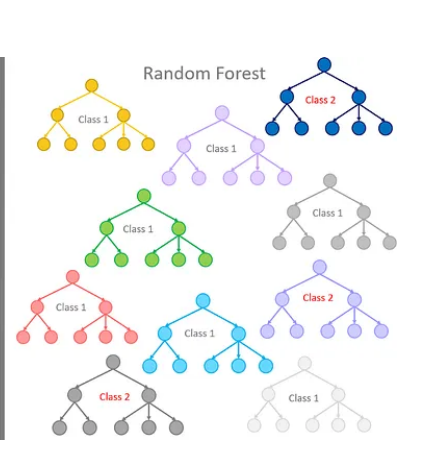

In [367]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [368]:
X=ou_df[['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route','Dep_Time', 'Arrival_Time', 'Duration (Minutes)', 'Total_Stops', 'Additional_Info']]
y = ou_df['Price']

In [369]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
rf_model = RandomForestRegressor()

rf_model.fit(X_train, y_train)


y_pred = rf_model.predict(X_test)

In [370]:
feature_importance = rf_model.feature_importances_

In [371]:
feature_importance

array([0.17711084, 0.20949376, 0.00759799, 0.01049288, 0.04956425,
       0.01454519, 0.02115264, 0.06930004, 0.40826717, 0.03247524])

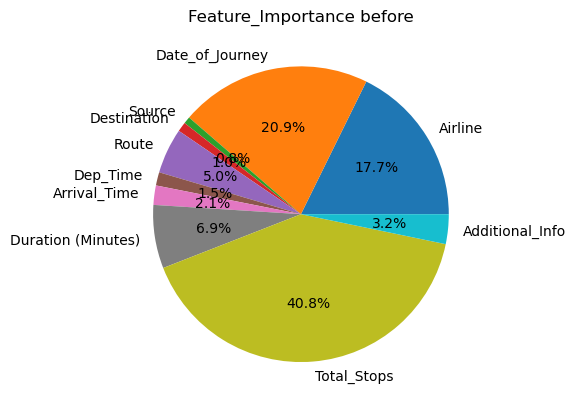

In [372]:
plt.figure()
plt.pie(feature_importance, labels=['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route','Dep_Time', 'Arrival_Time', 'Duration (Minutes)', 'Total_Stops', 'Additional_Info'], autopct='%1.1f%%')
plt.title('Feature_Importance before')
plt.show()

In [373]:
ou_df = ou_df.drop(columns=['Source'])
ou_df = ou_df.drop(columns=['Destination'])

In [386]:
ou_df.head(15)

,Airline,Date_of_Journey,Route,Dep_Time,Arrival_Time,Duration (Minutes),Total_Stops,Additional_Info,Price
0,1,2432019,1,4,1,170,0,1,3897
1,2,1052019,2,1,3,445,2,1,7662
2,3,0962019,3,2,1,1140,2,1,13882
3,1,1252019,4,4,4,325,1,1,6218
4,1,0132019,5,3,4,285,1,1,13302
5,4,2462019,6,2,2,145,0,1,3873
6,3,1232019,7,4,2,930,1,2,11087
7,3,0132019,7,2,1,135,1,1,22270
8,3,1232019,7,2,2,1530,1,2,11087
9,5,2752019,8,2,4,470,1,1,8625


In [374]:
X=ou_df[['Airline', 'Date_of_Journey', 'Route','Dep_Time', 'Arrival_Time', 'Duration (Minutes)', 'Total_Stops', 'Additional_Info']]
y = ou_df['Price']

In [375]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
rf_model = RandomForestRegressor()

rf_model.fit(X_train, y_train)


y_pred = rf_model.predict(X_test)


In [376]:
feature_importance = rf_model.feature_importances_

In [377]:
feature_importance

array([0.1808102 , 0.21130609, 0.06760342, 0.01755979, 0.02208413,
       0.07288219, 0.39468135, 0.03307284])

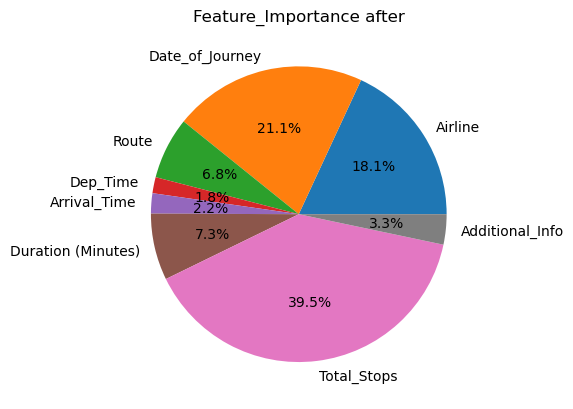

In [378]:
plt.figure()
plt.pie(feature_importance, labels=['Airline', 'Date_of_Journey', 'Route','Dep_Time', 'Arrival_Time', 'Duration (Minutes)', 'Total_Stops', 'Additional_Info'], autopct='%1.1f%%')
plt.title('Feature_Importance after')
plt.show()

In [379]:
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

R-squared: 0.8540558743387167


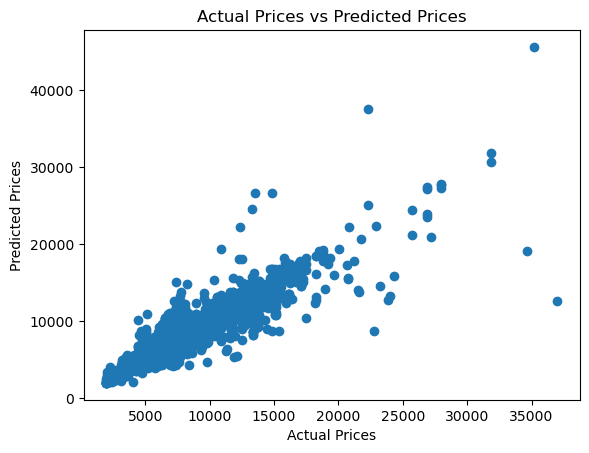

In [391]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()

## Cross Validation

In [381]:
cv_pred = cross_val_score(rf_model, X, y, cv=5, scoring='r2')

In [382]:
print(cv_pred)

[0.84842952 0.85166091 0.8922138  0.84798349 0.84772898]


### The max_samples parameter determines the maximum number of samples used to train each base estimator (tree) in the Random Forest.

In [383]:
param_grid = {'max_samples': [0.1, 10,20,30 ,100, 1000, 5000]}
grid = GridSearchCV(rf_model, param_grid, verbose =3,cv=5,scoring='r2')
grid.fit(X_train, y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV 1/5] END ...................max_samples=0.1;, score=0.823 total time=   1.3s
[CV 2/5] END ...................max_samples=0.1;, score=0.791 total time=   1.5s
[CV 3/5] END ...................max_samples=0.1;, score=0.761 total time=   1.5s
[CV 4/5] END ...................max_samples=0.1;, score=0.741 total time=   1.5s
[CV 5/5] END ...................max_samples=0.1;, score=0.793 total time=   1.5s
[CV 1/5] END ....................max_samples=10;, score=0.458 total time=   0.2s
[CV 2/5] END ....................max_samples=10;, score=0.401 total time=   0.2s
[CV 3/5] END ....................max_samples=10;, score=0.365 total time=   0.2s
[CV 4/5] END ....................max_samples=10;, score=0.379 total time=   0.2s
[CV 5/5] END ....................max_samples=10;, score=0.406 total time=   0.2s
[CV 1/5] END ....................max_samples=20;, score=0.523 total time=   0.2s
[CV 2/5] END ....................max_samples=20;,

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_samples': [0.1, 10, 20, 30, 100, 1000, 5000]},
             scoring='r2', verbose=3)

In [384]:
best_r2 = grid.best_score_
print("Best R-squared score:", best_r2)

Best R-squared score: 0.8454814919034449


In [385]:
print(grid.best_estimator_)

RandomForestRegressor(max_samples=5000)
